# Predicting heart disease using machine learning 

This notebook looks into using various `Python-based machine learning` and `data science libraries` in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes

We are going to take the following approach
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation


## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data if from the Cleveland data from the UCI machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+disease

There is also a version on Kaggle. https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we will pursue the project.

## 4. Features

This where you get different information about each of the features in your data

**Create data dictionary**

1. age
>age in years

2. sex
>(1 = male; 0 = female)

3. cp
>chest pain type

4. trestbps
>resting blood pressure (in mm Hg on admission to the hospital)

5. chol
>serum cholestoral in mg/dl

6. fbs
>(fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)

7. restecg
>resting electrocardiographic results

8. thalach
>maximum heart rate achieved

9. exang
>exercise induced angina (1 = yes; 0 = no)

10. oldpeak
>ST depression induced by exercise relative to rest

11. slope
>the slope of the peak exercise ST segment

12. ca
>number of major vessels (0-3) colored by flourosopy

13. thal
>1 = normal; 2 = fixed defect; 3 = reversable defect

14. target
>1 or 0

## Preparing the tools

We are going to use Pandas, Numpy and Matplotlib for data analysis and manipulation

In [7]:
# Import all the tools we need

# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import dill
import sys

import warnings

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# So that our plot will appear inside the notebook
%matplotlib inline 



# Models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
import lightgbm as lgb
from xgboost import XGBClassifier

#Model Evaluations
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score,RandomizedSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score, recall_score, f1_score,plot_roc_curve,RocCurveDisplay




# Load data

In [8]:
df =pd.read_csv("D:\\OneDrive\\Documents\\Personal Project Portfolio\\heart-diesease-project_Classification\\app\\data\\heart-disease.csv")
df.shape # (Rows, Columns)

(303, 14)

In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Data Exploratory Analysis (EDA)

The goal here is to find our more about the data and become a subject matter expert on the dataset you are working with.

1. What questions are you trying to solve
2. What kind of data do you have and how do we treat different types?
3. What is missing from the data and how do you deal with it
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?


In [10]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [12]:
df.target.value_counts() # method 1 of referencing columns

1    165
0    138
Name: target, dtype: int64

In [13]:
df['target'].value_counts() # method 2 of referencing columns

1    165
0    138
Name: target, dtype: int64

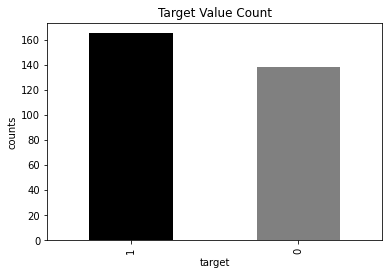

In [14]:
df.target.value_counts().plot(kind='bar',color=['black','gray'],
                              ylabel='counts', xlabel='target', title='Target Value Count');

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [16]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [17]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Sex

In [18]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

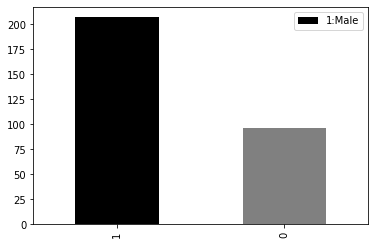

In [19]:
df.sex.value_counts().plot(kind='bar',color=['black','gray']
                           )
plt.legend(['1:Male', '0:Female']);



In [20]:
# compare target column with the sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


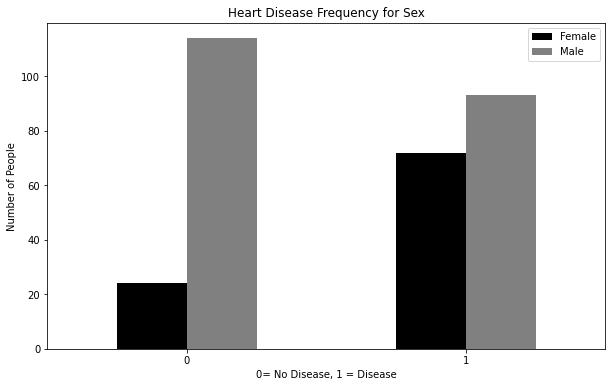

In [21]:
#create a plot of the crosstab
pd.crosstab(df.target,df.sex).plot(kind='bar',
                                  figsize=(10,6),
                                  color=['black','gray']);

plt.title('Heart Disease Frequency for Sex')
plt.xlabel('0= No Disease, 1 = Disease')
plt.ylabel ('Number of People')
plt.legend(['Female','Male']);
plt.xticks(rotation=0);

In [22]:
df.thalach.value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

#### Age Vs Max Heart Rate for Heart Disease

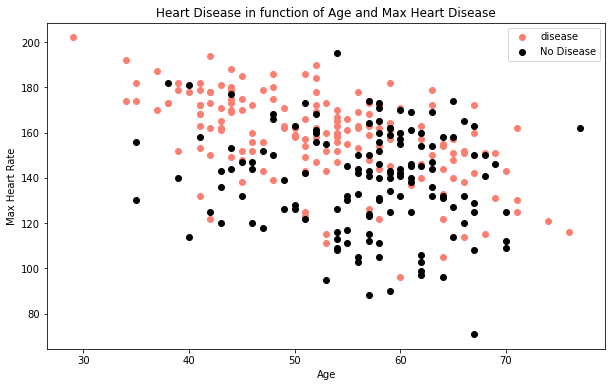

In [23]:
# Create another figure
plt.figure(figsize=(10,6))

# scatter with positive example
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            color=['Salmon'])

# scatter with negative example
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            color='black');

#Add some helpful info

plt.title('Heart Disease in function of Age and Max Heart Disease')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['disease','No Disease']);

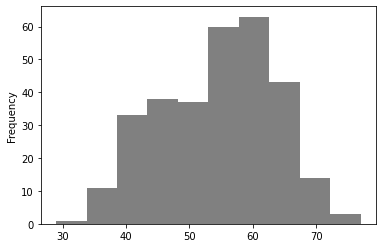

In [24]:
# Check the distribution of the Age column (Spread of the data)
df.age.plot.hist(color='gray');

## Compare the Chest Pain Type to Target
Heart disease frequency per chest pain type

cp: chest pain type
* Value 1: typical angina
* Value 2: atypical angina
* Value 3: non-anginal pain
* Value 4: asymptomatic

In [25]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


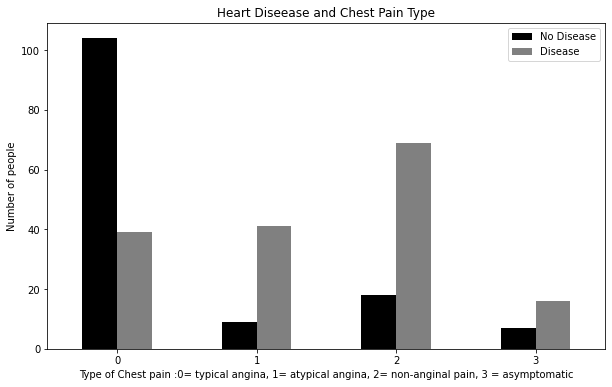

In [26]:
## make the crosstab more visual

pd.crosstab(df.cp,df.target).plot(kind='bar',color=['black','gray'],
                                 figsize=(10,6))

# Add some communication
plt.title('Heart Diseease and Chest Pain Type')
plt.xlabel('Type of Chest pain :0= typical angina, 1= atypical angina, 2= non-anginal pain, 3 = asymptomatic')
plt.ylabel('Number of people')
plt.legend(['No Disease','Disease']);
plt.xticks(rotation=0);

In [27]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


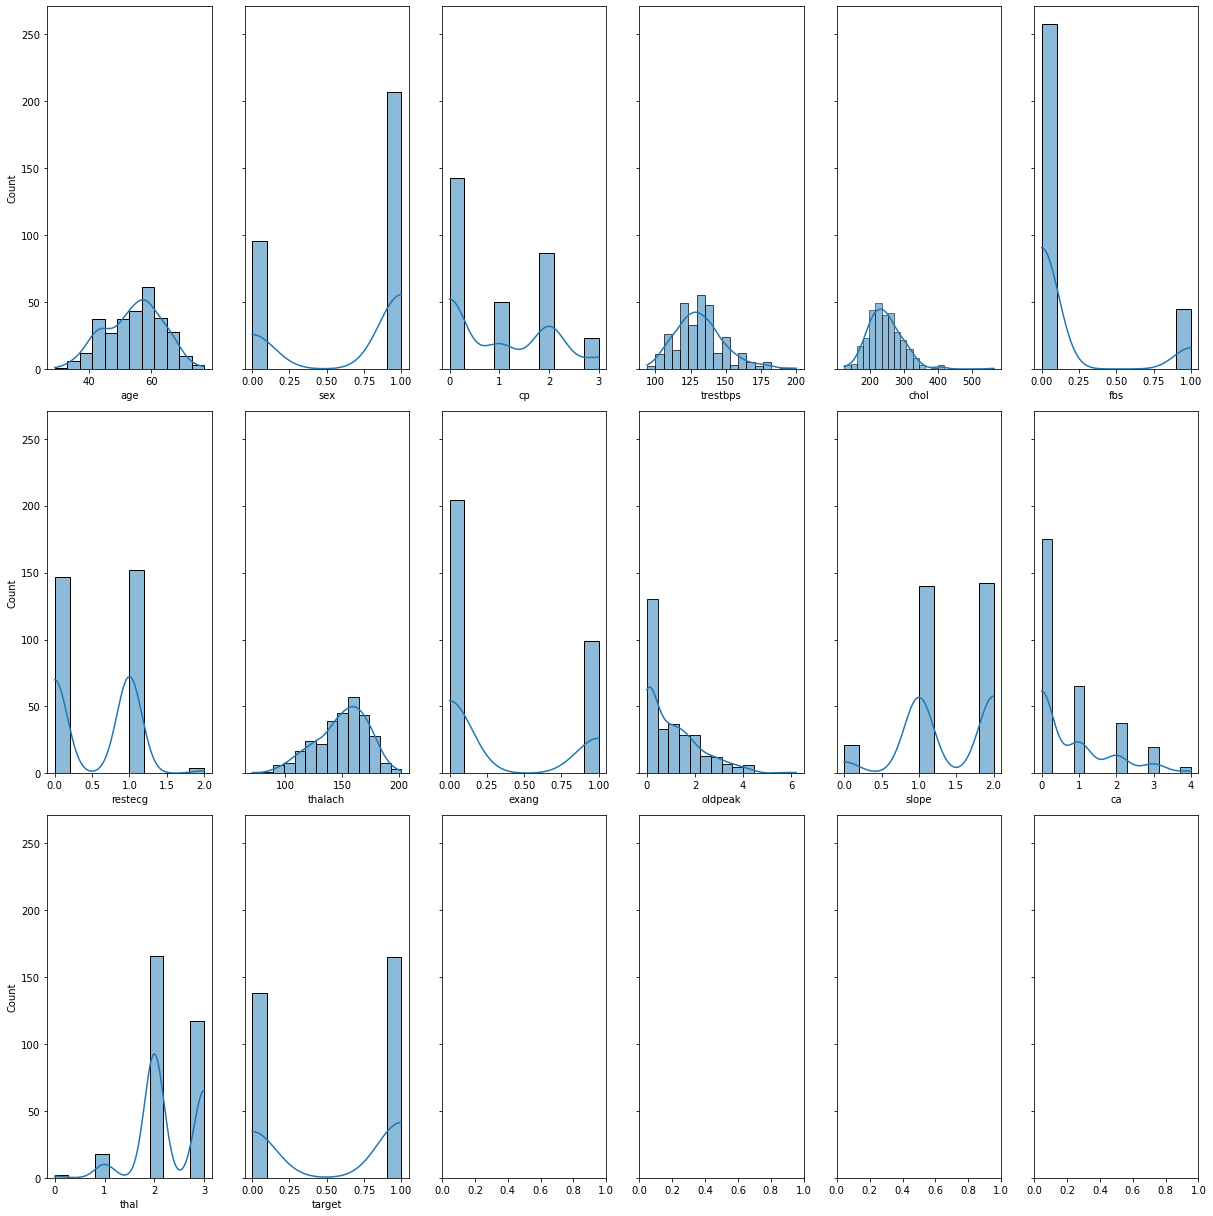

In [28]:
fig, axs = plt.subplots(3,6, figsize=(17,17),sharey=True)

sns.histplot(df, x='age',kde=True, ax=axs[0,0] )
sns.histplot(df, x='sex',kde=True, ax=axs[0,1] )
sns.histplot(df, x='cp',kde=True, ax=axs[0,2] )
sns.histplot(df, x='trestbps',kde=True, ax=axs[0,3] )
sns.histplot(df, x='chol',kde=True, ax=axs[0,4] )
sns.histplot(df, x='fbs',kde=True, ax=axs[0,5] )
sns.histplot(df, x='restecg',kde=True, ax=axs[1,0] )
sns.histplot(df, x='thalach',kde=True, ax=axs[1,1] )
sns.histplot(df, x='exang',kde=True, ax=axs[1,2] )
sns.histplot(df, x='oldpeak',kde=True, ax=axs[1,3] )
sns.histplot(df, x='slope',kde=True, ax=axs[1,4] )
sns.histplot(df, x='ca',kde=True, ax=axs[1,5] )
sns.histplot(df, x='thal',kde=True, ax=axs[2,0] )
sns.histplot(df, x='target',kde=True, ax=axs[2,1] );

plt.tight_layout()

In [29]:
# Make a correlation matrix of all the features
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


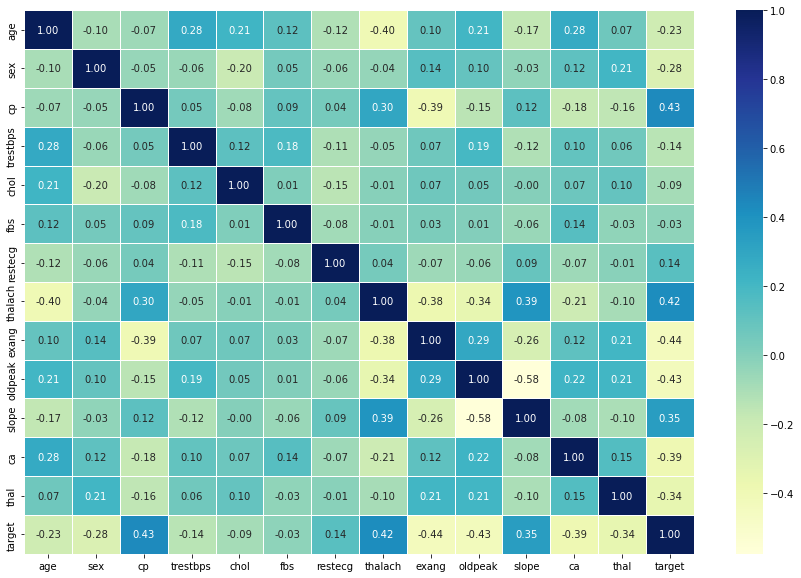

In [30]:
# Let's make our correlation matrix a little better
corr_matrix=df.corr()
fig,ax =plt.subplots(figsize=(15,10))

ax =sns.heatmap(corr_matrix,
               annot=True,
               linewidth=0.5,
               fmt='.2f',
               cmap='YlGnBu')

## 5. Modelling

In [31]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [32]:
# Split the data into X and y
X= df.drop('target',axis=1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [33]:
y = df.target
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [34]:
# Split the data into train and test sets
np.random.seed(42)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((242, 13), (242,), (61, 13), (61,))

Now that we have the data into training and test sets, it's time to build a machine learning model

We will train it (find the patterns) on the training set
And we will test it (use the patterns) on the test set

We are going to try out 3 different machine learning models
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [36]:
# Put models in a dictionary
models = {'Logistic Regression': LogisticRegression(),
          'KNN':KNeighborsClassifier(),
          'Randon Forest':RandomForestClassifier(),
          'SVM': SVC(),
          'XGB': XGBClassifier(), 
          'LightGBM': lgb.LGBMClassifier()}

# Create a function to fit and score models
def fit_and_score (models,X_Train,X_test,y_train,y_test):
    '''
    Fits and evaluates given machine learning models
    models: a dict of differeny Scikit-Learn machine learning models
    X_train: training data (no labels)
    X_test: test data (no labels)
    y_train: training labels
    y_test: test labels

    '''
    # set random seed
    np.random.seed(42)

    #make a dictionary to keep model scores
    model_scores={}

    # Loop through the models'
    for name,model in models.items():
        #Fit the model to the data
        model.fit(X_train,y_train)
        #Evaluate the model and append the score to model_score
        model_scores[name]=model.score(X_test,y_test)
    return model_scores




In [37]:
model_scores = fit_and_score(models=models,
                             X_Train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)

model_scores

d:\OneDrive\Documents\Personal Project Portfolio\heart-diesease-project_Classification\env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Info] Number of positive: 133, number of negative: 109
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001023 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 238
[LightGBM] [Info] Number of data points in the train set: 242, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.549587 -> initscore=0.199001
[LightGBM] [Info] Start training from score 0.199001
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Randon Forest': 0.8360655737704918,
 'SVM': 0.7049180327868853,
 'XGB': 0.819672131147541,
 'LightGBM': 0.8360655737704918}

## Model Comparison

In [38]:
model_compare=pd.DataFrame(model_scores,index=['accuracy'])
model_compare


,Logistic Regression,KNN,Randon Forest,SVM,XGB,LightGBM
accuracy,0.885246,0.688525,0.836066,0.704918,0.819672,0.836066


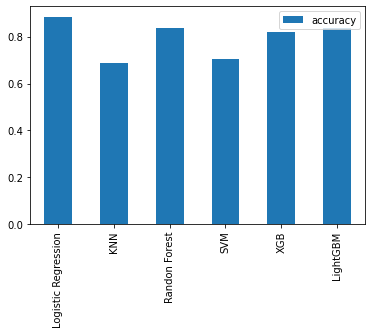

In [39]:
model_compare.T.plot(kind='bar');

Now we have got a baseline model and know a model's first predictions aren't always what we should base our next steps off.
What should i do?

let's look at the following:
* Hyperparameter tuning (*all types of models*)
* Feature importance (*all types of models*)
* Confusion matrix (*classification models only*)
* Cross-validation (*classification models only*???)
* Precision (*classification models only*)
* Recall (*classification models only*)
* F1 Score (*classification models only*)
* Classification report (*classification models only*)
* ROC curve (*classification models only*)
* Area under the curve (AUC) (*classification models only*)

## Hyperparameter tuning (by hand)



In [40]:
# Let's tune KNN
train_scores =[]
test_scores =[]

# Create a list if different values for n_neighbors
neighbors = range(1,21)

#Setup KNN instance 
knn = KNeighborsClassifier()

# loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    #fit the algorithm
    knn.fit(X_train,y_train)
    
    #update the training scores list
    train_scores.append(knn.score(X_train,y_train))
    
    #update the test scores list
    test_scores.append(knn.score(X_test,y_test))
    



In [41]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [42]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


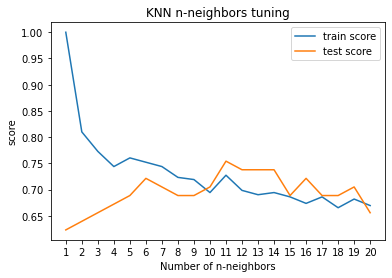

In [43]:
plt.plot(neighbors,train_scores,label='train score')
plt.plot(neighbors,test_scores,label='test score');


#Add some communications
plt.title("KNN n-neighbors tuning")
plt.xlabel('Number of n-neighbors')
plt.xticks(np.arange(1,21,1))
plt.ylabel('score')
plt.legend(['train score','test score'])

print (f'Maximum KNN score on the test data: {max(test_scores)*100:.2f}%');

## Hyperparameter tuning (by RandomizedSearchCV )

We are going to tune:
* LogisticRegression()
* RandomForestClassifier()
.......RandomizedSearchCv

In [44]:
# Create a hyperparameter grid for LogisticRegression()
log_reg_grid = {"C":np.logspace(-4,4,20),
               'solver':['liblinear']}

# Create a hyperparameter grid for RandomForestClassifier()
rf_grid= {'n_estimators':np.arange(10,1000,50),
         'max_depth':[None,3,5,10],
         'min_samples_split':np.arange(2,20,2),
         'min_samples_leaf':np.arange(1,20,2)}

Now we have hyperparameter grids setup for each of our models, lets tune them using RandomizedSearchCV... 

In [45]:
# Tune LogisticRegression

np.random.seed(42)

# setup random hyperparameter search for LogisticRegression
rs_log_reg =RandomizedSearchCV(LogisticRegression(),
                              param_distributions=log_reg_grid,
                              cv=5,
                              n_iter=20,
                              verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [46]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [47]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

Now we have tuned LogisticRegression(), let's do the same for RandomForestClassifier()

In [48]:
# Setup random seed
np.random.seed(42)

# setup random hyperparameter search for RandomForestClassifier
rf =RandomizedSearchCV(RandomForestClassifier(),
                              param_distributions=rf_grid,
                              cv=5,
                              n_iter=20,
                              verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier
rf.fit(X_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [49]:
# Find the best hyperparameters
rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [50]:
# Evaluate the randomized search RandomForestClassifier model
rf.score(X_test,y_test)

0.8688524590163934

## Tuning hyperparameter (Use the GridSearchCV for the LogisticRegression() model)

## Hyperparameter Tuning with GridSearchCV

Since our logisticRegression model provides the best score so far, we'll try and improve them again using GridSearchCV...

In [51]:
# Different parameters for our LogisticRegression model
log_reg_grid= {'C': np.logspace(-4,4,100),
              'solver':['liblinear']}

#Setup grid hyperparameter search for LogisticRegression
gs_log_reg =GridSearchCV(LogisticRegression(),
                        param_grid=log_reg_grid,
                        cv=5,
                        verbose=True)

#Fit grid hyperparameter search model
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.20450354e-04, 1.45082878e-04, 1.74752840e-04,
       2.10490414e-04, 2.53536449e-04, 3.05385551e-04, 3.67837977e-04,
       4.43062146e-04, 5.33669923e-04, 6.42807312e-04, 7.74263683e-04,
       9.32603347e-04, 1.12332403e-03, 1.35304777e-03, 1.62975083e-03,
       1.96304065e-03, 2.36448941e-03, 2.848035...
       1.38488637e+02, 1.66810054e+02, 2.00923300e+02, 2.42012826e+02,
       2.91505306e+02, 3.51119173e+02, 4.22924287e+02, 5.09413801e+02,
       6.13590727e+02, 7.39072203e+02, 8.90215085e+02, 1.07226722e+03,
       1.29154967e+03, 1.55567614e+03, 1.87381742e+03, 2.25701972e+03,
       2.71858824e+03, 3.27454916e+03, 3.94420606e+03, 4.75081016e+03,
       5.72236766e+03, 6.89261210e+03, 8.30217568e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [52]:
gs_log_reg.best_params_

{'C': 0.20565123083486536, 'solver': 'liblinear'}

In [53]:
# Evaluate the grid search LogisticRegression() model
gs_log_reg.score(X_test,y_test)

0.8852459016393442

## Evaluating our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

...and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions




In [54]:
# Make predictions with tuned model
y_preds =gs_log_reg.predict(X_test)

In [55]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

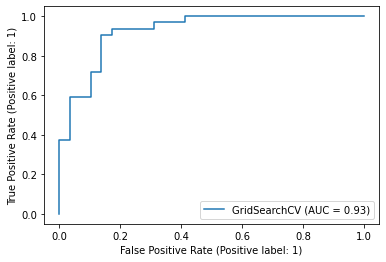

In [56]:
#Plot the ROC curve and calculate the AUC metric
plot_roc_curve(gs_log_reg,X_test,y_test);

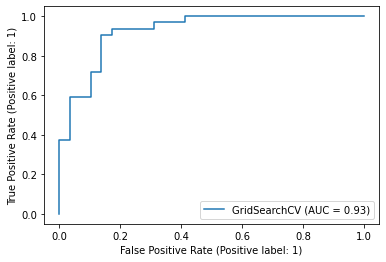

In [57]:
# Use the latest method for ROC Curve
#import the required function
from sklearn.metrics import RocCurveDisplay


RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test);


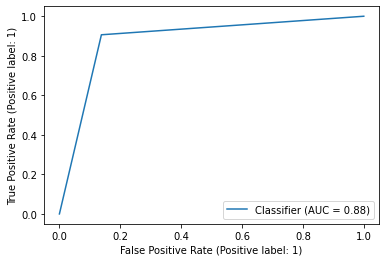

In [58]:
RocCurveDisplay.from_predictions(y_test,y_preds);

In [60]:
# Confusion matrix
print (confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


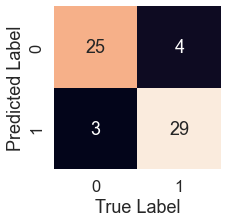

In [61]:
#Visualise using seaborn
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    '''
    Plot a nice looking confusion matrix using seaborn's heatmap()
    '''
    fig,ax =plt.subplots(figsize=(3,3))
    ax =sns.heatmap(confusion_matrix(y_test,y_preds),
                   annot=True,
                   cbar=False)
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')
    
plot_conf_mat(y_test,y_preds)

Now we've got the ROC curve, an AUC metric, a confusion matrix, let's get a classification report as well as cross-validated precision, recall and f1-score

In [62]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics (precision ,recall and f1-score) using cross-validation

We are going to calculate precision, recall and f1-score of our model using cross-validation and to do so we will be using cross_val_score().


In [63]:
#check the best hyperparameters 
gs_log_reg.best_params_

{'C': 0.20565123083486536, 'solver': 'liblinear'}

In [64]:
# Create a new classifier with best parameters
clf =LogisticRegression(C=0.20565123083486536,solver ='liblinear')



In [65]:
#cross-validated accuracy
cv_acc=cross_val_score(clf,
                       X,
                       y,
                       cv=5,
                       scoring ='accuracy')
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [66]:
cv_acc=np.mean(cv_acc)
cv_acc

0.8479781420765027

In [67]:
#cross-validated precision
cv_precision=cross_val_score(clf,
                       X,
                       y,
                       cv=5,
                       scoring ='precision')
cv_precision

array([0.775     , 0.88571429, 0.86111111, 0.86111111, 0.725     ])

In [68]:
cv_precision=np.mean(cv_precision)
cv_precision

0.8215873015873015

In [69]:
#cross-validated recall
cv_recall =cross_val_score(clf,
                       X,
                       y,
                       cv=5,
                       scoring ='recall')
cv_recall=np.mean(cv_recall)
cv_recall


0.9272727272727274

In [70]:
#cross-validated f1-score
cv_f1 =cross_val_score(clf,
                       X,
                       y,
                       cv=5,
                       scoring ='f1')
cv_f1=np.mean(cv_f1)
cv_f1

0.8705403543192143

In [71]:
# Visualise the cross-validated metrics
cv_metrics =pd.DataFrame({'Accuracy':cv_acc,
                        'Precision':cv_precision,
                        'Recall':cv_recall,
                        'F1':cv_f1},index =[0])
cv_metrics

,Accuracy,Precision,Recall,F1
0,0.847978,0.821587,0.927273,0.87054


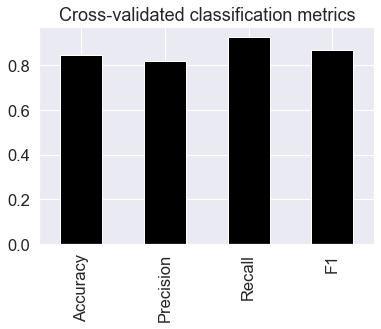

In [72]:
cv_metrics.T.plot(kind='bar',color='black',title='Cross-validated classification metrics',legend=False);

### Feature Importance

Feature importance is another way of asking, "which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model.One way to find feature importance is to search for ('MODEL NAME') feature importance

Let's find the feature importance for our LogisticRegression model


In [74]:
# Fit an instance of LogisticRegression

clf= LogisticRegression(C=0.20565123083486536,solver ='liblinear')

clf.fit(X_train,y_train)

LogisticRegression(C=0.20565123083486536, solver='liblinear')

In [75]:
# Check coef_
clf.coef_

array([[ 0.00319408, -0.86266439,  0.66136689, -0.01157126, -0.00166584,
         0.04409684,  0.31372144,  0.02460091, -0.60548722, -0.56897571,
         0.45150948, -0.63682329, -0.67765878]])

In [76]:
# Match coef's of features to columns
feature_dict=dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0031940815776341225,
 'sex': -0.8626643885575526,
 'cp': 0.6613668871885502,
 'trestbps': -0.011571259108394972,
 'chol': -0.0016658449546624607,
 'fbs': 0.044096844265705794,
 'restecg': 0.3137214376770939,
 'thalach': 0.02460090893204839,
 'exang': -0.6054872231322187,
 'oldpeak': -0.5689757145118807,
 'slope': 0.4515094750995757,
 'ca': -0.6368232889782905,
 'thal': -0.6776587839962399}

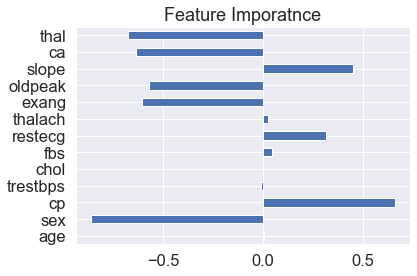

In [78]:
# Visualise feature importances
feature_df =pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.barh(title='Feature Imporatnce',legend=False);

In [79]:
pd.crosstab(df['sex'],df['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [80]:
pd.crosstab(df['slope'],df['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


slope-the slope of the peak exercise ST segment
* 0: Upsloping: better heart rate with exercise (uncommon)
* 1: Flatsloping: minimal change (typical healthy heart)
* 2: Downsloping signs of unhealthy heart

## 6. Experimentation

If you haven't hit your evaluation metric target yet......ask yourself...

* Could you collect more data?
* Could you try a better model? Like CatBoost or XGBoost?
* Could you improve the current models ? (beyond what is done so far)

If model is good enough (you have hit your evaluation metric) how would you export it and share it with others?

In [ ]:
# Lets try XGBoostm lightGBM and SVM clasifier
# !pip install xgboost
# !pip install lightgbm
# !pip install SVC

In [82]:
# Add helper function with hyperparameter tuning with GridSearch CV
def evaluate_models(X_train, y_train, X_test, y_test, models, param):
    try:
        """
        This method fits and score the models provided while doing a gridsearch cross
        validation using the parameter grid provided
        
        input: X-train - Training data input features
             y_train - Training data label 
             X_test - Test data input features
             y_test - Test data labels
             models - ML model to experiment with
             param :dict - parameter settings to try as values.
             
        Returns: a dictionary of the a key values pair of model and score
        """ 
                
        report = {}

        for i in range(len(list(models))):
            model = list(models.values())[i]
            para=param[list(models.keys())[i]]

            gs = GridSearchCV(model,para,cv=3, verbose=3)
            gs.fit(X_train,y_train)

            model.set_params(**gs.best_params_)
            model.fit(X_train,y_train)

            test_model_score = model.score(X_test, y_test)

            report[list(models.keys())[i]] = test_model_score
        return report
    except Exception as e:
        raise e

In [84]:
def load_object(file_path):
    try:
        with open(file_path, "rb") as file_obj:
            return dill.load(file_obj)

    except Exception as e:
        raise CustomException(e, sys)
        
        
def save_object(file_path, obj):
    with open(file_path, 'wb') as file_obj:
        dill.dump(obj, file_obj)

In [85]:
# update the fit_score_best_model helper function

def fit_and_score_best_model(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates models passed to it.
    
    Parameters:
    -----------
    models : Dictionary of machine learning models
    X_train : training data (without labels)
    X_test : test data (without labels)
    y_train : training labels
    y_test : test labels
    
    Returns:
    -----------
    The best performing model out of the model passed to it
    
    """
    
    # Set random seed
    np.random.seed(42)

    # Create the parameter grid
    params = {
    'Logistic Regression': {
        'penalty': ['l2'],  # Removing 'None', 'l1', 'elasticnet'
        'dual': [False],    # Keeping only False
        'solver': ['lbfgs', 'liblinear']  # Most common solvers
    },
    'SVM': {
        'C': [0.1, 1, 10],  # Reduced range
        'kernel': ['linear', 'rbf'],  # Most common kernels
        'degree': [3],  # Commonly used degree for polynomial kernel
        'gamma': ['scale']  # Default value
    },
    'Random Forest': {
        'criterion': ['gini'],  # Keeping only 'gini'
        'max_features': ['sqrt'],  # Common practice
        'n_estimators': [32, 128],  # Reduced range
        'max_leaf_nodes': [None],  # Default value
        'bootstrap': [True],  # Common practice
        'n_jobs': [1],  # Using single core to avoid memory issues
        'max_samples': [None],  # Default value
        'min_samples_split': [2, 10],  # Reduced range
        'min_samples_leaf': [1, 5]  # Reduced range
    },
    'XGB': {
        'learning_rate': [0.01, 0.1],  # Reduced range
        'max_depth': [6, 8],  # Commonly used depths
        'gamma': [2, 9],  # Reduced range
        'sampling_method': ['uniform'],  # Default value
        'grow_policy': ['depthwise'],  # Common practice
        'n_estimators': [32, 128]  # Reduced range
    },
    'LightGBM': {
        'boosting_type': ['gbdt'],  # Common practice
        'max_depth': [-1, 2],  # Reduced range
        'learning_rate': [0.01, 0.1],  # Reduced range
        'n_estimators': [100, 200],  # Reduced range
        'num_leaves': [31, 50]  # Reduced range
    }
}

               
    # Evaluate the model and append its score to model_report
    model_report:dict=evaluate_models(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test,
                                                models=models, param=params)
        
    # To get best model score from dict
    best_model_score = max(sorted(model_report.values()))
        
    # To get best model name from dict
    best_model_name = list(model_report.keys())[
                list(model_report.values()).index(best_model_score)
            ]
    best_model = models[best_model_name]

    if best_model_score < 0.6:
        print("No best model found")

    save_object(
                file_path="D:\\OneDrive\\Documents\\Personal Project Portfolio\\"
                "heart-diesease-project_Classification\\app\\artifacts\\best_model\\model.pkl",
                obj=best_model
            )

    return print(f'Best Model: {best_model}, Score: {best_model_score}')

In [86]:
# put models in a dictionary
models = {'Logistic Regression':LogisticRegression(),'SVM': SVC(),'Random Forest': RandomForestClassifier(),
           'XGB': XGBClassifier(), 'LightGBM': lgb.LGBMClassifier() }

best_model = fit_and_score_best_model(models, X_train=X_train, X_test=X_test,
                                      y_train=y_train, y_test=y_test)

best_model

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV 1/3] END dual=False, penalty=l2, solver=lbfgs;, score=0.815 total time=   0.0s
[CV 2/3] END dual=False, penalty=l2, solver=lbfgs;, score=0.741 total time=   0.0s
[CV 3/3] END dual=False, penalty=l2, solver=lbfgs;, score=0.850 total time=   0.0s

d:\OneDrive\Documents\Personal Project Portfolio\heart-diesease-project_Classification\env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\OneDrive\Documents\Personal Project Portfolio\heart-diesease-project_Classification\env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the docum


[CV 1/3] END dual=False, penalty=l2, solver=liblinear;, score=0.815 total time=   0.0s
[CV 2/3] END dual=False, penalty=l2, solver=liblinear;, score=0.753 total time=   0.0s
[CV 3/3] END dual=False, penalty=l2, solver=liblinear;, score=0.850 total time=   0.0s
Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END C=0.1, degree=3, gamma=scale, kernel=linear;, score=0.802 total time=   0.0s
[CV 2/3] END C=0.1, degree=3, gamma=scale, kernel=linear;, score=0.716 total time=   0.1s
[CV 3/3] END C=0.1, degree=3, gamma=scale, kernel=linear;, score=0.863 total time=   0.1s
[CV 1/3] END C=0.1, degree=3, gamma=scale, kernel=rbf;, score=0.556 total time=   0.0s
[CV 2/3] END C=0.1, degree=3, gamma=scale, kernel=rbf;, score=0.543 total time=   0.0s
[CV 3/3] END C=0.1, degree=3, gamma=scale, kernel=rbf;, score=0.550 total time=   0.0s
[CV 1/3] END C=1, degree=3, gamma=scale, kernel=linear;, score=0.765 total time=   0.6s
[CV 2/3] END C=1, degree=3, gamma=scale, kernel=linear;, sc